# How the sausage is made

In [889]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import welly
import scipy
import striplog

In [ ]:
# Generate random numbers as an example
rn = np.random.uniform(low=0, high=1, size=(20,))

# Make a random plot...
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rn,"r")
ax.grid()
#######################


# Setup the canvas object to extract images INCLUDING axes elements
width = 900 #pixels
height = 150 #pixels
# matplotlib likes image sizes in inches (thanks America)
# so we need to now how many pixels fit on an inch on your screen (DotsPerInch)
DPI = fig.get_dpi()
fig.set_size_inches(width/float(DPI),height/float(DPI))
fig.canvas.draw()
#######################

# Now we can save it to a numpy array. These are faily obscure functions...
# the .tostring_rgb() generates a binary representation of the WHOLE plot
# np.frombuffer reads the binary and interprets it as a collection of integers
# At the end they're just a long list of RGB colors in 1 dimension
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

# Retrieve the original shape of the plot inverted (height, width)
im_shape = fig.canvas.get_width_height()[::-1]

# We can now make a 3-D array (height, width, 3) "one 2D image per color channel"
data = data.reshape(*im_shape, 3)

In [ ]:
plt.imshow(data[:,0:150,2], cmap="Greys_r")

In [ ]:
plt.imshow(data[:,150:300,2], cmap="Greys_r")

In [6]:
shrimplin = pd.read_csv('shrimplin.csv')


In [932]:
shrimplin.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,4.384289,2910.501062,69.408896,0.659679,7.708493,12.173705,4.219958,1.488323,0.514482
std,2.207070,68.055644,37.299536,0.232894,4.279453,5.317152,0.902823,0.500395,0.289757
min,2.000000,2793.000000,13.280000,0.297000,-4.300000,1.590000,2.700000,1.000000,0.010000
25%,2.500000,2851.750000,46.895000,0.486000,4.300000,8.065000,3.400000,1.000000,0.261000
50%,3.000000,2910.500000,69.480000,0.580000,7.300000,12.170000,4.000000,1.000000,0.513000
75%,6.000000,2969.250000,85.995000,0.827500,11.150000,15.127500,5.000000,2.000000,0.765000
max,9.000000,3028.000000,361.150000,1.480000,18.500000,37.470000,6.300000,2.000000,1.000000


In [858]:
def logchunks(wellname, GR):
    
    width = 150
    height = 900
   
    ########## mask chunks whose value is the same everywhere (blank chunks),
    ########## stop feeling like a potato
    
    fig = plt.figure()
    ax1 = fig.add_subplot(232)
    ax1.plot(GR, 'Depth', "r", data = wellname)
    ax1.set(xlabel = GR)
    ax1.grid()
    plt.gca().invert_yaxis()
    DPI = fig.get_dpi()
    fig.set_size_inches(width/float(DPI),height/float(DPI))
    fig.canvas.draw()
    plt.close('all')

    bawps_new = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    im_shape = fig.canvas.get_width_height()[::-1]
    bawps_new = bawps_new.reshape(*im_shape, 3)
    
    numchunk = 10
    chunks2 = []
    for i in range(numchunk):
        #plt.subplots()
        Depth_array = np.array(wellname['Depth']).size
        chunklen = int(Depth_array/numchunk)
        chunks1 = ((bawps_new[(i*chunklen):((i+1)*chunklen), : ,2]))
        chunks2.append(chunks1)
    sum_if_blank = 255*chunklen*int(chunks2[0].shape[1])
    chunks = [x for x in chunks2 if np.sum(x) != sum_if_blank]
    
    for i in range(len(chunks)):
        plt.subplots()
        plt.imshow(chunks[i], cmap = "Greys_r")
        
#return list of chunks here, do they need to be saved as a file?
    return chunks

#relate cutting depths of each chunk (what is the range
#of the actual depth that each chunk is ie chunk 3 depth is 
#a little less than 2850 to 2875 maybe??)

#maybe save the depth of each well log as a list and reference specific range of depth?
#play with padding or margins to make well log same size as chunks

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

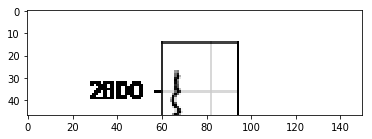

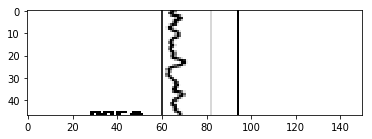

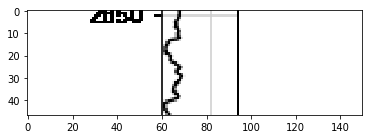

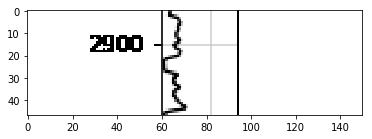

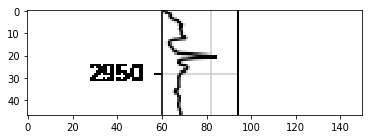

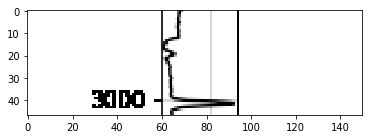

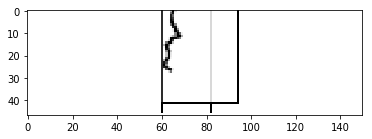

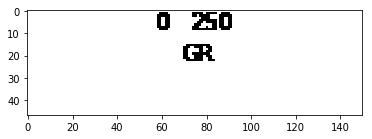

In [859]:
logchunks(shrimplin,'GR')

# Sausaging LAS files 

In [866]:
import zipfile; import os; import urllib

os.makedirs('./temp', exist_ok=True)
raspath = 'http://www.kgs.ku.edu/PRS/Ora_Archive/ks_elog_scans.zip'
laspath = 'http://www.kgs.ku.edu/PRS/Ora_Archive/ks_las_files.zip'

ras_handle, _ = urllib.request.urlretrieve(raspath)
las_handle, _ = urllib.request.urlretrieve(laspath)

with zipfile.ZipFile(ras_handle,'r') as zip_ras:
    zip_ras.extractall('temp')
with zipfile.ZipFile(las_handle,'r') as zip_las:
    zip_las.extractall('temp')

In [867]:
elogs = pd.read_csv('temp/ks_elog_scans.txt', parse_dates=True)
lases = pd.read_csv('temp/ks_las_files.txt', parse_dates=True)

In [863]:
lases.describe()

,KGS_ID,Latitude,Longitude,Elevation,Depth_start,Depth_stop
count,1.935500e+04,19355.000000,19355.000000,19349.000000,19355.000000,19355.000000
mean,1.031636e+09,38.279273,-99.253280,2175.699838,798.730061,3841.977470
std,1.761870e+07,0.765678,1.696698,706.369338,1294.776780,1742.409777
min,1.001184e+09,36.994026,-102.043705,5.000000,-46.000000,-18.700000
25%,1.006144e+09,37.605713,-100.605021,1718.000000,1.000000,3283.500000
50%,1.043341e+09,38.297115,-99.469217,2147.000000,200.000000,3965.500000
75%,1.044247e+09,38.820400,-98.533249,2791.000000,994.000000,4760.500000
max,1.046839e+09,40.001832,-94.629981,3955.000000,38550.000000,63841.000000


In [875]:
elogs_mask = elogs['KID'].isin(lases['KGS_ID'])  # Create mask for elogs
both_elog_unique = elogs[elogs_mask] # select items elog that fall in both
both_elog_unique.drop_duplicates('KID') # remove duplicates
print('How many logs fall in both and have unique KGS_ID? '+str(both_elog_unique.shape[0]))
both_elog_unique_new = both_elog_unique.loc['2000-1-1' : '2017-1-1']
both_elog_unique_new;

How many logs fall in both and have unique KGS_ID? 62941


In [876]:
lases_mask = lases['KGS_ID'].isin(elogs['KID'])  # Create mask for elogs
both_lases = lases[lases_mask] # select items elog that fall in both
both_lases_unique = both_lases.drop_duplicates('KGS_ID') # remove duplicates
print('Other direction -- how many logs fall in both and have unique KGS_ID? '+str(both_lases_unique.shape[0]))
if both_elog_unique.shape[0] == both_lases_unique.shape[0]:
    print('Same in both directions.')
both_lases_unique;

Other direction -- how many logs fall in both and have unique KGS_ID? 14699


In [877]:
randomlas_line = both_lases_unique.loc['2000-1-1' : '2017-1-1'].sample(n=1)

In [878]:
str(randomlas_line['URL'])
randomlas_line

,KGS_ID,Latitude,Longitude,Location,Operator,Lease,API,Elevation,Elev_Ref,Depth_start,Depth_stop,URL
2005,1002905393,37.452055,-96.658314,"T30S R7E, Sec. 10, SW NW SW",RAYMOND T. DUNCAN INC.,WHITEHILL 1,15-035-23754,1447.0,KB,290.0,3408.0,http://www.kgs.ku.edu/WellLogs/30S07E/10439171...


In [879]:
randomlas_url = randomlas_line['URL'].tolist()[0]
randomlas_dl, _ = urllib.request.urlretrieve(randomlas_url)

with zipfile.ZipFile(randomlas_dl,'r') as zip_randomlas:
    zip_randomlas.extractall('temp')
    # change temp to kgs id so temp file number will match

In [880]:
randomlas_line['KGS_ID'].tolist()[0]

1002905393

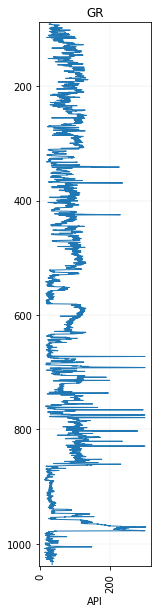

In [1026]:
from welly import Well; from welly import Curve
l = Well.from_las('temp/1043917113.las') # hardcoded until I figure out how to get filename
l.data['GR']
l.data['GR'].plot(lw=0.5)
#l.location.md(1039)
rando_las = l.df()

In [1021]:
rando_las.index.name
#wtf??

'DEPTH'

In [1027]:
rando_las.describe()
#Depth isn't a column on this LAS file, how can it
#be referenced in the function?

,GR,ILD,DT,DPHI,NPHI
count,6205.000000,6145.000000,6147.000000,4023.000000,4023.000000
mean,74.157187,17.050905,77.510892,0.095966,0.157315
std,41.922877,42.524083,19.541804,0.069595,0.086781
min,11.582000,0.847000,45.933000,-0.055000,0.006000
25%,35.711000,4.962000,59.133000,0.051000,0.076000
50%,76.077000,7.007000,77.209000,0.083000,0.170000
75%,102.358000,18.460000,91.128000,0.118000,0.227000
max,301.762000,1963.496000,159.000000,0.300000,0.300000


In [1032]:
def logchunks(wellname, GR):
    
    width = 150
    height = 900
   
    ########## stop feeling like a potato
    
    fig = plt.figure()
    ax1 = fig.add_subplot(232)
    
    #need y axis defined here:
    ax1.plot(GR, rando_las['DEPTH'], "r", data = wellname)
    
    ax1.set(xlabel = GR)
    ax1.grid()
    plt.gca().invert_yaxis()
    DPI = fig.get_dpi()
    fig.set_size_inches(width/float(DPI),height/float(DPI))
    fig.canvas.draw()
    plt.close('all')

    bawps_new = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    im_shape = fig.canvas.get_width_height()[::-1]
    bawps_new = bawps_new.reshape(*im_shape, 3)
    
    numchunk = 10
    chunks2 = []
    for i in range(numchunk):
        
        #need y axis defined here:
        Depth_array = np.array(rando_las['DEPTH']).size
        
        chunklen = int(Depth_array/numchunk)
        chunks1 = ((bawps_new[(i*chunklen):((i+1)*chunklen), : ,2]))
        chunks2.append(chunks1)
    sum_if_blank = 255*chunklen*int(chunks2[0].shape[1])
    chunks = [x for x in chunks2 if np.sum(x) != sum_if_blank]
    
    for i in range(len(chunks)):
        plt.subplots()
        plt.imshow(chunks[i], cmap = "Greys_r")
        
    return chunks


#play with padding or margins to make well log same size as chunks     

KeyError: 'DEPTH'

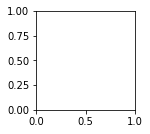

In [1033]:
logchunks(rando_las, 'GR')